<a href="https://colab.research.google.com/github/vashisht9474/sampling/blob/main/SAMPLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  import pandas as pd

except:
  !pip install pandas

In [2]:
import sklearn

In [4]:
df=pd.read_csv('/content/Creditcard_data.csv')

In [5]:
import matplotlib.pyplot as plt

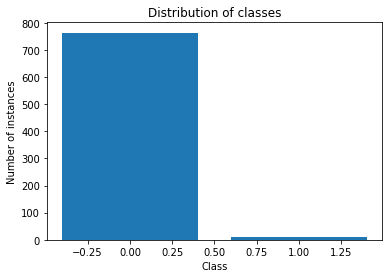

In [6]:
import matplotlib.pyplot as plt

# Count the number of instances for each class
class_counts = df['Class'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Distribution of classes')
plt.show()

In [7]:
df.info

<bound method DataFrame.info of      Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1       0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..    ...       ...       ...       ...       ...       ...       ...   
767   575 -0.572263  0.731748  1.541254  0.150506  1.108974  0.372152   
768   579 -1.296845 -0.511605  2.404726 -0.310762 -0.319551 -0.542842   
769   579  1.214170  0.210481  0.484651  0.479768 -0.261955 -0.527039   
770   580  1.267030 -0.071114  0.037680  0.512683  0.242392  0.705212   
771   581  1.153758  0.132273  0.382969  1.405063 -0.224287 -0.197295   

           V7        V8        V9  ...       V21       V22       V23  \
0    0.239599  0.09

In [8]:
df.shape

(772, 31)

before  oversampling: (772, 30)
After oversampling: (1526, 30)
(1526, 31)


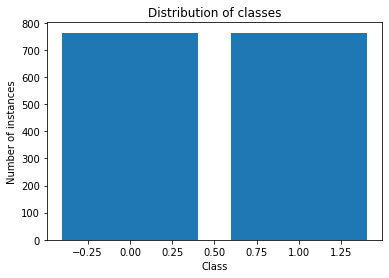

In [9]:
#in this cell i am balancing the dataset into equal classes
from imblearn.over_sampling import RandomOverSampler

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print("before  oversampling:", X.shape)
ros = RandomOverSampler(sampling_strategy='minority')
# Convert to numpy and oversample
x_np = X.to_numpy()
y_np = y.to_numpy()
x_np, y_np = ros.fit_resample(x_np, y_np)
# Convert back to pandas
X = pd.DataFrame(x_np, columns=X.columns)
y = pd.Series(y_np, name=y.name)
print("After oversampling:", X.shape)

new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
new_df.columns = df.columns 
print(new_df.shape)
#now checking the distribution of classes after we performed oversampling
import matplotlib.pyplot as plt

# Count the number of instances for each class
class_counts = new_df['Class'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Distribution of classes')
plt.show()



In [11]:
#now my new dataset is new_df which is a balanced dataset
from sklearn.metrics import accuracy_score
sample_size = 100

# applying simple random sampling with the desired sample size
sampled_df = new_df.sample(n=sample_size)

# print the sampled dataframe
print(sampled_df)

#now training on the sample
X = sampled_df.drop('Class', axis=1)
y = sampled_df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)




# compute the accuracy score
accuracy_rf_s1 = accuracy_score(y_test, y_pred)

# print the accuracy score
print(f'Testing accuracy: {accuracy_rf_s1:.3f}')
l=list()
l.append(accuracy_rf_s1)
print(l)

       Time        V1        V2        V3        V4        V5        V6  \
696   525.0 -0.755011 -0.517761  1.760091 -0.654206 -0.039143 -0.492847   
994   539.0 -1.738582  0.052740  1.187057 -0.656652  0.920623 -0.291788   
835   484.0 -0.928088  0.398194  1.741131  0.182673  0.966387 -0.901004   
199   132.0 -0.394816  1.054418  1.206361 -0.289232  0.610284  0.081529   
475   352.0 -0.703183  1.210704  0.713731  1.146381  0.196790  0.468060   
...     ...       ...       ...       ...       ...       ...       ...   
691   523.0  1.119589  1.131586 -1.533011  1.545223  0.929388 -1.158350   
1449  118.0  1.254914  0.350287  0.302488  0.693114 -0.371470 -1.070256   
876   529.0 -2.000567 -2.495484  2.467149  1.140053  2.462010  0.594262   
1017  118.0  1.254914  0.350287  0.302488  0.693114 -0.371470 -1.070256   
553   413.0  1.146594 -0.353208  0.834120  0.708139 -0.749014  0.189676   

            V7        V8        V9  ...       V21       V22       V23  \
696  -0.047345  0.118936  

In [12]:
#sample1--svm
from sklearn.svm import SVC
print(X.shape)
svm = SVC(kernel='linear', C=1,)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)
accuracy_svm_s1 = accuracy_score(y_test, y_pred)

# print the accuracy score
print(accuracy_svm_s1)
l.append(accuracy_svm_s1)

(100, 30)
0.9


In [13]:
#sample1--etc
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=42)
etc.fit(X_train, y_train)
y_pred=etc.predict(X_test)
accuracy_etc_s1 = accuracy_score(y_test, y_pred)

# print the accuracy score
print(accuracy_etc_s1)
l.append(accuracy_etc_s1)


1.0


In [14]:
#sample1--dt
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
accuracy_dt_s1=accuracy_score(y_test,y_pred)
print(accuracy_dt_s1)

l.append(accuracy_dt_s1)


0.95


In [172]:

print(l)




[]


In [15]:
#sample1--nb
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
accuracy_nb_s1=accuracy_score(y_test,y_pred)
print(f'Testing accuracy: {accuracy_nb_s1:.4f}')
l.append(accuracy_nb_s1)

Testing accuracy: 0.9500


In [16]:
print(l)

[1.0, 0.9, 1.0, 0.95, 0.95]


In [17]:
#SYSTEMATIC SAMPLING
n = 100

# Calculate the sampling interval
k = len(df) // n

# Select the systematic sample
systematic_sample = new_df.iloc[::k][:n]

# Print the systematic sample
print(systematic_sample)
sys_X=systematic_sample.drop('Class',axis=1)
sys_y=systematic_sample['Class']

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(sys_X, sys_y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X1_train, y1_train)
y1_pred= rf.predict(X1_test)
accuracy_rf_s2=accuracy_score(y1_test,y1_pred)
print(accuracy_rf_s2)
l2=list()
l2.append(accuracy_rf_s2)
print(l2)


      Time        V1        V2        V3        V4        V5        V6  \
0      0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
7      7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
14    12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
21    17.0  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038   
28    23.0 -0.414289  0.905437  1.727453  1.473471  0.007443 -0.200331   
..     ...       ...       ...       ...       ...       ...       ...   
665  503.0  0.860545 -0.747804 -0.955151 -1.124056  0.186536 -0.385942   
672  509.0 -0.404841  1.005372  1.372756  0.005994 -0.118849 -0.788473   
679  513.0  1.255258  0.075190  0.225733  0.881766  0.154508  0.631960   
686  518.0 -0.743471  0.943604  1.486464 -0.179575 -0.190966 -0.295559   
693  524.0 -0.795322  0.081238  2.210568  0.268145 -0.506875 -0.303840   

           V7        V8        V9  ...       V21       V22       V23  \
0    0.239599  0.098698  0.363787  ... 

In [18]:
from sklearn.svm import SVC
print(X.shape)
svm = SVC(kernel='linear', C=1,)
svm.fit(X1_train, y1_train)
y1_pred=svm.predict(X1_test)
accuracy_svm_s2 = accuracy_score(y1_test, y1_pred)

# print the accuracy score
print(accuracy_svm_s2)
l2.append(accuracy_svm_s2)


(100, 30)
0.95


In [19]:
#sample2--etc
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=42)
etc.fit(X1_train, y1_train)
y_pred=etc.predict(X1_test)
accuracy_etc_s2 = accuracy_score(y1_test, y_pred)

# print the accuracy score
print(accuracy_etc_s2)
l2.append(accuracy_etc_s2)

1.0


In [20]:
#sample1--dt
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X1_train, y1_train)
y_pred=dtc.predict(X1_test)
accuracy_dt_s2=accuracy_score(y1_test,y_pred)
print(accuracy_dt_s2)

l2.append(accuracy_dt_s2)

0.95


In [21]:
#sample2--nb
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X1_train, y1_train)
y_pred=dtc.predict(X1_test)
accuracy_nb_s2=accuracy_score(y1_test,y_pred)
print(accuracy_nb_s2)
l2.append(accuracy_nb_s2)

0.95


In [22]:

print(l2)

[1.0, 0.95, 1.0, 0.95, 0.95]


In [23]:

df = pd.DataFrame({'Sample1': l, 'Sample2': l2})
print(df)

   Sample1  Sample2
0     1.00     1.00
1     0.90     0.95
2     1.00     1.00
3     0.95     0.95
4     0.95     0.95


In [24]:
# based on some criteria. For example, if the data contains
# a categorical variable called "category", we can use that
# to define the strata as follows:
new_df['stratum'] = pd.cut(new_df['Class'], bins=3,
                       labels=['low', 'medium', 'high'])

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Define the number of splits for the StratifiedShuffleSplit
n_splits = 5

# Define the Random Forest model
rf = RandomForestClassifier()

# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Loop through the splits and fit the model
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    rf.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    print(f'Accuracy score: {accuracy}')
l3=list()
l3.append(accuracy)    

Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1,)

from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Define the number of splits for the StratifiedShuffleSplit
n_splits = 5

# Define the Random Forest model
svm.fit(X1_train, y1_train)

# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Loop through the splits and fit the model
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    y1_pred=svm.predict(X1_test)
    

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    print(f'Accuracy score: {accuracy}')
l3.append(accuracy)      


Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484


In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=42)


from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Define the number of splits for the StratifiedShuffleSplit
n_splits = 5

# Define the Random Forest model


# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Loop through the splits and fit the model
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    etc.fit(X_train, y_train)
    y_pred=etc.predict(X_test)
    

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    print(f'Accuracy score: {accuracy}')
l3.append(accuracy) 

Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484
Accuracy score: 0.9870967741935484


In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)



from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Define the number of splits for the StratifiedShuffleSplit
n_splits = 5

# Define the Random Forest model


# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Loop through the splits and fit the model
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    dtc.fit(X_train, y_train)
    y_pred=dtc.predict(X_test)
    

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    print(f'Accuracy score: {accuracy}')
l3.append(accuracy) 

Accuracy score: 0.9741935483870968
Accuracy score: 0.9935483870967742
Accuracy score: 0.9806451612903225
Accuracy score: 0.9806451612903225
Accuracy score: 0.967741935483871


In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()




from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Define the number of splits for the StratifiedShuffleSplit
n_splits = 5

# Define the Random Forest model


# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Loop through the splits and fit the model
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    nb.fit(X_train, y_train)
    y_pred=dtc.predict(X_test)
    

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    print(f'Accuracy score: {accuracy}')
l3.append(accuracy) 

Accuracy score: 0.9870967741935484
Accuracy score: 0.9935483870967742
Accuracy score: 1.0
Accuracy score: 0.9935483870967742
Accuracy score: 0.967741935483871


In [35]:
print(l3)

[0.9870967741935484, 0.9870967741935484, 0.9870967741935484, 0.967741935483871, 0.967741935483871]


In [36]:

df = pd.DataFrame({'Sample1': l, 'Sample2': l2,'Sample3':l3})
print(df)

   Sample1  Sample2   Sample3
0     1.00     1.00  0.987097
1     0.90     0.95  0.987097
2     1.00     1.00  0.987097
3     0.95     0.95  0.967742
4     0.95     0.95  0.967742


In [54]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Initialize the KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the data
kmeans.fit(X)

# Extract the cluster labels
cluster_labels = kmeans.labels_

# Split the data into training and test sets based on the cluster labels
train_indices = []
test_indices = []
for cluster_id in range(kmeans.n_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_size = len(cluster_indices)
    train_size = int(cluster_size * 0.8)
    train_indices.extend(cluster_indices[:train_size])
    test_indices.extend(cluster_indices[train_size:])

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Fit the model on the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy score: {accuracy}')
l4=list()
l4.append(accuracy)



Accuracy score: 0.9871794871794872


In [55]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1,)
from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Initialize the KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the data


# Extract the cluster labels


# Split the data into training and test sets based on the cluster labels
train_indices = []
test_indices = []
for cluster_id in range(kmeans.n_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_size = len(cluster_indices)
    train_size = int(cluster_size * 0.8)
    train_indices.extend(cluster_indices[:train_size])
    test_indices.extend(cluster_indices[train_size:])

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Fit the model on the training data

svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy score
accuracy1 = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy score: {accuracy1}')

l4.append(accuracy1)


Accuracy score: 0.9871794871794872


In [56]:
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=42)
from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Initialize the KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the data


# Extract the cluster labels


# Split the data into training and test sets based on the cluster labels
train_indices = []
test_indices = []
for cluster_id in range(kmeans.n_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_size = len(cluster_indices)
    train_size = int(cluster_size * 0.8)
    train_indices.extend(cluster_indices[:train_size])
    test_indices.extend(cluster_indices[train_size:])

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Fit the model on the training data

etc.fit(X_train, y_train)

# Predict on the test data
y_pred = etc.predict(X_test)

# Calculate the accuracy score
accuracy2 = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy score: {accuracy2}')

l4.append(accuracy2)

Accuracy score: 0.9871794871794872


In [57]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Initialize the KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the data


# Extract the cluster labels


# Split the data into training and test sets based on the cluster labels
train_indices = []
test_indices = []
for cluster_id in range(kmeans.n_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_size = len(cluster_indices)
    train_size = int(cluster_size * 0.8)
    train_indices.extend(cluster_indices[:train_size])
    test_indices.extend(cluster_indices[train_size:])

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Fit the model on the training data

dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Calculate the accuracy score
accuracy3 = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy score: {accuracy3}')

l4.append(accuracy3)

Accuracy score: 0.9487179487179487


In [60]:
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
from sklearn.metrics import accuracy_score
import pandas as pd

# Load data
data = pd.read_csv('/content/Creditcard_data.csv')

# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Initialize the KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the data


# Extract the cluster labels


# Split the data into training and test sets based on the cluster labels
train_indices = []
test_indices = []
for cluster_id in range(kmeans.n_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_size = len(cluster_indices)
    train_size = int(cluster_size * 0.8)
    train_indices.extend(cluster_indices[:train_size])
    test_indices.extend(cluster_indices[train_size:])

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Fit the model on the training data

nb.fit(X_train, y_train)

# Predict on the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy score
accuracy4 = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy score: {accuracy4}')

l4.append(accuracy4)

Accuracy score: 0.9423076923076923


In [61]:

print(l4)

[0.9871794871794872, 0.9871794871794872, 0.9871794871794872, 0.9487179487179487, 0.9423076923076923]


In [62]:
# FINAL SOLTION----------------------------------------------------------------
df = pd.DataFrame({'Sample1': l, 'Sample2': l2,'Sample3':l3,'Sample4':l4})
print(df)

   Sample1  Sample2   Sample3   Sample4
0     1.00     1.00  0.987097  0.987179
1     0.90     0.95  0.987097  0.987179
2     1.00     1.00  0.987097  0.987179
3     0.95     0.95  0.967742  0.948718
4     0.95     0.95  0.967742  0.942308
